#                                    Indian startup funding

#### About Notebook: 

I want to investigate whether the startup companies is getting a funding of greater than 1 Million or not based on the other parameters like location, month,industry,etc...

Possible questions which could be answered are:

- How does funding change with InvestmentType? <br> 
- Do cities play a major role in funding? <br>
- How does the funding ecosystem change with time? <br>

#### Importing librarys 

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

#### About Dataset
This dataset has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).

In [5]:
data = pd.read_csv("startup_funding.csv")

#### Dataset sample

In [6]:
print('Rows {rows} and Columns {columns}'.format(rows=data.shape[0],columns=data.shape[1]))

Rows 2372 and Columns 10


In [7]:
# Displaying first four rows of the dataframe
data.head(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN


In [8]:
# Displaying last four rows of the dataframe
data.tail(4) 

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"825,000",Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"1,500,000",NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"140,000",NaN


In [9]:
data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
SNo                 2372 non-null int64
Date                2372 non-null object
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null object
Remarks             419 non-null object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


### Data clean up for Analysis (filling missing values)

#### Identifying the missing vales in data

In [10]:
missing_values_count = data.isnull().sum()

In [11]:
missing_values_count[0:10]

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

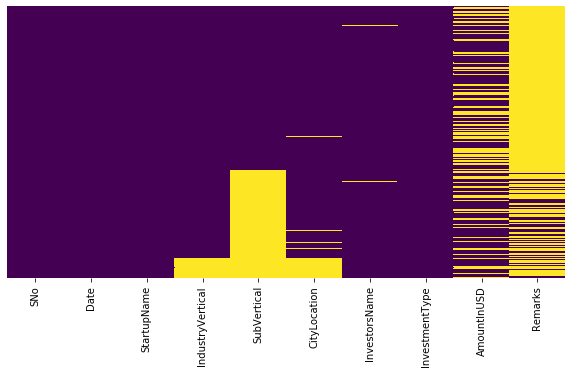

In [12]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

Creating a copy to update the dataset 

In [13]:
newdata=data.copy()

#### Formating and filling in missing values in AmountInUSD

AmountInUSD is not in integer, it has ','. So we will remove ',' and format into integer using regular expressions

In [14]:
import re;
def replace_comma_with_emptySpace(x):
    if re.search(',',x): 
        return (x.replace(',',''))
    return x
newdata['AmountInUSD']=newdata[newdata['AmountInUSD'].notnull()]['AmountInUSD'].apply(replace_comma_with_emptySpace).astype('int')

In [15]:
newdata['AmountInUSD']=round(newdata['AmountInUSD'].fillna(0))

In [16]:
newdata.head(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.0,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0.0,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN


#### Formatting and filling in city location

In [17]:
newdata['CityLocation']=newdata['CityLocation'].fillna(value='NotSpecified')

In [18]:
def convert_Slash(x):#converts citylocation where multiple citiescentres
    x=x.lower()
    if   re.search('/',x):
        return x.split('/')[0].strip()
    else :
        return x.strip()
newdata['CityLocation']=newdata['CityLocation'].apply(convert_Slash)

In [19]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,notspecified,KARSEMVEN Fund,Private Equity,825000.0,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,notspecified,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,notspecified,MakeMyTrip,Private Equity,0.0,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,notspecified,UK based Group of Angel Investors,Seed Funding,140000.0,NaN


#### Formatting Date

In [20]:
def rem_err_date(x):#function checks for error in format of date column in funding dataframe
    if re.search('.',x):
        return x.replace('.','')
    return x
newdata['Date']=newdata['Date'].apply(rem_err_date)
newdata['Date'].replace('12/052015','12/05/2015',inplace=True)
newdata['Date'].replace('15/012015','15/01/2015',inplace=True)
newdata['Date'].replace('22/01//2015','22/01/2015',inplace=True)
newdata['Date'].replace('13/042015','13/04/2015',inplace=True)

In [21]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,notspecified,KARSEMVEN Fund,Private Equity,825000.0,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,notspecified,"Exfinity Fund, GrowX Ventures.",Private Equity,1500000.0,NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,notspecified,MakeMyTrip,Private Equity,0.0,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,notspecified,UK based Group of Angel Investors,Seed Funding,140000.0,NaN


#### Formatting Inverstment type

In [22]:
newdata['InvestmentType'].value_counts().index

Index(['Seed Funding', 'Private Equity', 'SeedFunding', 'Crowd Funding',
       'PrivateEquity', 'Debt Funding', 'Crowd funding'],
      dtype='object')

In [23]:
newdata['InvestmentType'].fillna(method='bfill',inplace=True)#backward filling of null values

In [24]:
newdata['InvestmentType']= [x.replace(' ', '').lower() for x in newdata['InvestmentType']]

In [25]:
newdata['InvestmentType'].value_counts().index

Index(['seedfunding', 'privateequity', 'crowdfunding', 'debtfunding'], dtype='object')

In [26]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,NaN,NaN,notspecified,KARSEMVEN Fund,privateequity,825000.0,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,NaN,NaN,notspecified,"Exfinity Fund, GrowX Ventures.",privateequity,1500000.0,NaN
2370,2370,30/01/2015,Simplotel,NaN,NaN,notspecified,MakeMyTrip,privateequity,0.0,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,NaN,NaN,notspecified,UK based Group of Angel Investors,seedfunding,140000.0,NaN


#### Fill in missing IndustryVertical

In [27]:
newdata['IndustryVertical']=newdata['IndustryVertical'].fillna(value='Other')

In [28]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,Other,NaN,notspecified,KARSEMVEN Fund,privateequity,825000.0,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,Other,NaN,notspecified,"Exfinity Fund, GrowX Ventures.",privateequity,1500000.0,NaN
2370,2370,30/01/2015,Simplotel,Other,NaN,notspecified,MakeMyTrip,privateequity,0.0,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,Other,NaN,notspecified,UK based Group of Angel Investors,seedfunding,140000.0,NaN


#### Fill in missing SubVertical

In [29]:
newdata['SubVertical']=newdata['SubVertical'].fillna(value='Other')

In [30]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,Other,Other,notspecified,KARSEMVEN Fund,privateequity,825000.0,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,Other,Other,notspecified,"Exfinity Fund, GrowX Ventures.",privateequity,1500000.0,NaN
2370,2370,30/01/2015,Simplotel,Other,Other,notspecified,MakeMyTrip,privateequity,0.0,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,Other,Other,notspecified,UK based Group of Angel Investors,seedfunding,140000.0,NaN


#### Fill in missing InvestorsName

In [31]:
newdata['InvestorsName']=newdata['InvestorsName'].fillna(value='Unknown')

In [32]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
2368,2368,29/01/2015,Graphene,Other,Other,notspecified,KARSEMVEN Fund,privateequity,825000.0,Govt backed VC Fund
2369,2369,30/01/2015,Mad Street Den,Other,Other,notspecified,"Exfinity Fund, GrowX Ventures.",privateequity,1500000.0,NaN
2370,2370,30/01/2015,Simplotel,Other,Other,notspecified,MakeMyTrip,privateequity,0.0,"Strategic Funding, Minority stake"
2371,2371,31/01/2015,couponmachine.in,Other,Other,notspecified,UK based Group of Angel Investors,seedfunding,140000.0,NaN


#### Deleting unwanted column remarks

In [33]:
del newdata['Remarks'] # This is not used for any of our analysis

In [34]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
2368,2368,29/01/2015,Graphene,Other,Other,notspecified,KARSEMVEN Fund,privateequity,825000.0
2369,2369,30/01/2015,Mad Street Den,Other,Other,notspecified,"Exfinity Fund, GrowX Ventures.",privateequity,1500000.0
2370,2370,30/01/2015,Simplotel,Other,Other,notspecified,MakeMyTrip,privateequity,0.0
2371,2371,31/01/2015,couponmachine.in,Other,Other,notspecified,UK based Group of Angel Investors,seedfunding,140000.0


Analysis of data after clean up

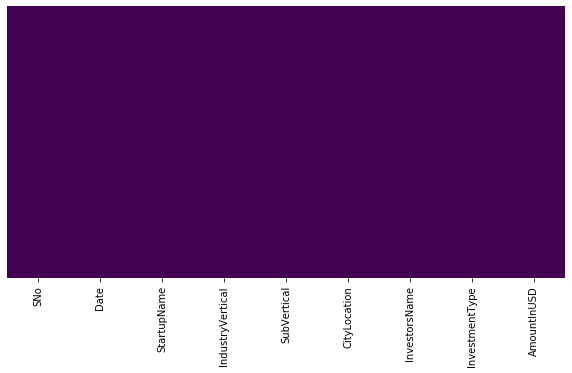

In [35]:
plt.figure(figsize=(10,5))
sns.heatmap(newdata.isnull(),cmap='viridis',yticklabels=False,cbar=False)

## Data exploration

In [36]:
newdata['Date'] = pd.to_datetime(newdata['Date'], format='%d/%m/%Y')
newdata['YrMo'] = [str(x.year) + '-' + str(x.month).zfill(2) for x in newdata['Date']]

In [37]:
newdata.tail(4)

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,YrMo
2368,2368,2015-01-29,Graphene,Other,Other,notspecified,KARSEMVEN Fund,privateequity,825000.0,2015-01
2369,2369,2015-01-30,Mad Street Den,Other,Other,notspecified,"Exfinity Fund, GrowX Ventures.",privateequity,1500000.0,2015-01
2370,2370,2015-01-30,Simplotel,Other,Other,notspecified,MakeMyTrip,privateequity,0.0,2015-01
2371,2371,2015-01-31,couponmachine.in,Other,Other,notspecified,UK based Group of Angel Investors,seedfunding,140000.0,2015-01


#### How does the funding ecosystem change with time ?

[Text(0.5, 0, 'Investment Count'),
 Text(0.5, 1.0, '# of Startup Investments ($>0)')]

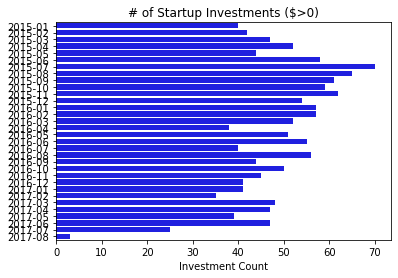

In [38]:
PosFund_df = newdata.loc[newdata['AmountInUSD'] > 0,['YrMo','AmountInUSD']]
fundCountsByMo = PosFund_df['YrMo'].value_counts()
FundCounts_df = pd.DataFrame(fundCountsByMo).sort_index()
ax = sns.barplot(FundCounts_df.YrMo, FundCounts_df.index, orient="h", color='b')
ax.set(xlabel='Investment Count', title='# of Startup Investments ($>0)')
#sns.plt.show()

#### How does funding change with InvestmentType?

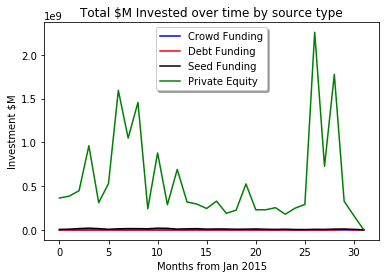

In [39]:
#Make df such that there's an entry for each investment type
FundTotal_df = pd.pivot_table(newdata,index=['YrMo'],values=['AmountInUSD'],columns=['InvestmentType'], aggfunc=np.sum, fill_value=0)['AmountInUSD'].reset_index()

fig, ax = plt.subplots()
ax.plot(FundTotal_df['crowdfunding'], 'b', label='Crowd Funding')
ax.plot(FundTotal_df['debtfunding'], 'r', label='Debt Funding')
ax.plot(FundTotal_df['seedfunding'], 'k', label='Seed Funding')
ax.plot(FundTotal_df['privateequity'], 'g', label='Private Equity')
ax.set(xlabel='Months from Jan 2015', ylabel='Investment $M', title='Total $M Invested over time by source type')
legend = ax.legend(loc='upper center', shadow=True)
plt.show()



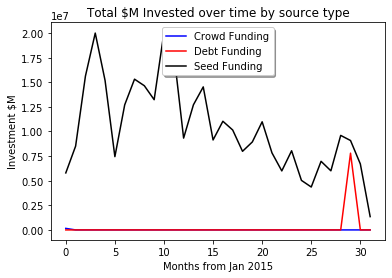

In [40]:
fig,ax = plt.subplots()
ax.plot(FundTotal_df['crowdfunding'], 'b', label='Crowd Funding')
ax.plot(FundTotal_df['debtfunding'], 'r', label='Debt Funding')
ax.plot(FundTotal_df['seedfunding'], 'k', label='Seed Funding')
ax.set(xlabel='Months from Jan 2015', ylabel='Investment $M', title='Total $M Invested over time by source type')
legend = ax.legend(loc='upper center', shadow=True)
plt.show()

#### Do cities play a major role in funding? 

Description count of Location
bangalore       635
mumbai          449
new delhi       385
gurgaon         241
notspecified    179
Name: CityLocation, dtype: int64


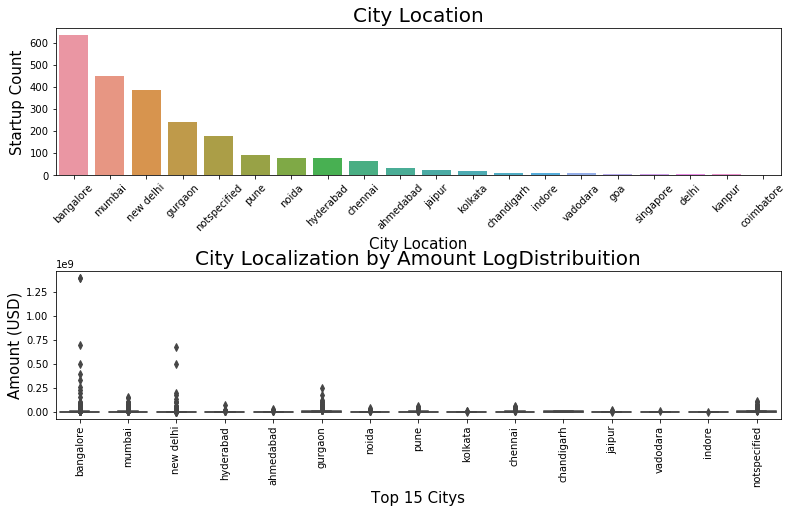

In [41]:
location = newdata['CityLocation'].value_counts()
print("Description count of Location")
print(location[:5])

plt.figure(figsize=(13,7))

plt.subplot(211)
sns.barplot(x=location.index[:20], y=location.values[:20])
plt.xticks(rotation=45)
plt.xlabel('City Location', fontsize=15)
plt.ylabel('Startup Count', fontsize=15)
plt.title("City Location", fontsize=20)

plt.subplot(212)
g = sns.boxplot(x='CityLocation', y="AmountInUSD",
                data=newdata[newdata.CityLocation.isin(location[:15].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("City Localization by Amount LogDistribuition", fontsize=20)
g.set_xlabel("Top 15 Citys", fontsize=15)
g.set_ylabel("Amount (USD)", fontsize=15)

plt.subplots_adjust(hspace = 0.65,top = 0.9)

plt.show()

# Feature engineering

##### Deleting columns - SNo, Startup Name and Remarks as they do not add any value

In [42]:
del newdata['SNo']
del newdata['StartupName']

As various startups have multiple number of investors, we will have no of investors as seperate column 

In [43]:
def calculate_n_investors(x):
    if  re.search(',',x) and x!='empty':
        return len(x.split(','))
    elif x!='empty':
        return 1
    else:
        return -1
newdata['NumberOfInvestors']=newdata['InvestorsName'].replace(np.NaN,'empty').apply(calculate_n_investors)

In [44]:
newdata.head(4)

,Date,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,YrMo,NumberOfInvestors
0,2017-08-01,Technology,Predictive Care Platform,bangalore,Kae Capital,privateequity,1300000.0,2017-08,1
1,2017-08-02,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,privateequity,0.0,2017-08,1
2,2017-08-02,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,0.0,2017-08,7
3,2017-08-02,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000.0,2017-08,4


In [45]:
newdata['Year'] = [str(x.year) for x in newdata['Date']]

In [46]:
newdata.head(4)

,Date,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,YrMo,NumberOfInvestors,Year
0,2017-08-01,Technology,Predictive Care Platform,bangalore,Kae Capital,privateequity,1300000.0,2017-08,1,2017
1,2017-08-02,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,privateequity,0.0,2017-08,1,2017
2,2017-08-02,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,0.0,2017-08,7,2017
3,2017-08-02,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000.0,2017-08,4,2017


In [47]:
newdata['Month'] = [str(x.month) for x in newdata['Date']]

In [48]:
newdata.head(4)

,Date,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,YrMo,NumberOfInvestors,Year,Month
0,2017-08-01,Technology,Predictive Care Platform,bangalore,Kae Capital,privateequity,1300000.0,2017-08,1,2017,8
1,2017-08-02,Technology,Digital Marketing Agency,mumbai,Triton Investment Advisors,privateequity,0.0,2017-08,1,2017,8
2,2017-08-02,Consumer Internet,Online platform for Higher Education Services,new delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",seedfunding,0.0,2017-08,7,2017,8
3,2017-08-02,Consumer Internet,DIY Ecommerce platform,mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",seedfunding,500000.0,2017-08,4,2017,8


In [49]:
#Using One-hot encoding for Investment Type
newdata = pd.get_dummies(newdata, columns=['InvestmentType'], prefix = ['InvestmentType'])

In [50]:
newdata.tail(4)

,Date,IndustryVertical,SubVertical,CityLocation,InvestorsName,AmountInUSD,YrMo,NumberOfInvestors,Year,Month,InvestmentType_crowdfunding,InvestmentType_debtfunding,InvestmentType_privateequity,InvestmentType_seedfunding
2368,2015-01-29,Other,Other,notspecified,KARSEMVEN Fund,825000.0,2015-01,1,2015,1,0,0,1,0
2369,2015-01-30,Other,Other,notspecified,"Exfinity Fund, GrowX Ventures.",1500000.0,2015-01,2,2015,1,0,0,1,0
2370,2015-01-30,Other,Other,notspecified,MakeMyTrip,0.0,2015-01,1,2015,1,0,0,1,0
2371,2015-01-31,Other,Other,notspecified,UK based Group of Angel Investors,140000.0,2015-01,1,2015,1,0,0,0,1


# Feature selection

In [51]:
newdata['AmountGreaterThanMillion'] = newdata['AmountInUSD'].apply(lambda x: 1 if x >= 1000000 else 0)
label = newdata['AmountGreaterThanMillion']

features = newdata.drop(['AmountInUSD', 'Date', 'InvestorsName', 'SubVertical', 'YrMo'], axis=1)

features = pd.get_dummies(features, columns=['IndustryVertical'], prefix = ['IndustryVertical'])
features = pd.get_dummies(features, columns=['CityLocation'], prefix = ['CityLocation'])

In [52]:
features.head()

,NumberOfInvestors,Year,Month,InvestmentType_crowdfunding,InvestmentType_debtfunding,InvestmentType_privateequity,InvestmentType_seedfunding,AmountGreaterThanMillion,IndustryVertical_360-degree view creating platform,IndustryVertical_3D Printer Manufacturer,...,CityLocation_siliguri,CityLocation_singapore,CityLocation_surat,CityLocation_trivandrum,CityLocation_udaipur,CityLocation_udupi,CityLocation_us,CityLocation_usa,CityLocation_vadodara,CityLocation_varanasi
0,1,2017,8,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2017,8,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,2017,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2017,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2017,8,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
features.tail(4)

,NumberOfInvestors,Year,Month,InvestmentType_crowdfunding,InvestmentType_debtfunding,InvestmentType_privateequity,InvestmentType_seedfunding,AmountGreaterThanMillion,IndustryVertical_360-degree view creating platform,IndustryVertical_3D Printer Manufacturer,...,CityLocation_siliguri,CityLocation_singapore,CityLocation_surat,CityLocation_trivandrum,CityLocation_udaipur,CityLocation_udupi,CityLocation_us,CityLocation_usa,CityLocation_vadodara,CityLocation_varanasi
2368,1,2015,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2369,2,2015,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2370,1,2015,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2371,1,2015,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
label.tail

<bound method NDFrame.tail of 0       1
1       0
2       0
3       0
4       0
       ..
2367    1
2368    0
2369    1
2370    0
2371    0
Name: AmountGreaterThanMillion, Length: 2372, dtype: int64>

# Modelling

#### To train and test, we are dividing the datasets into tain and test datasets

In [55]:
from sklearn.model_selection import train_test_split

features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.2, random_state=75)


In [56]:
features_train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1897 entries, 1519 to 248
Columns: 801 entries, NumberOfInvestors to CityLocation_varanasi
dtypes: int64(2), object(2), uint8(797)
memory usage: 1.5+ MB


In [57]:
features_test.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475 entries, 1224 to 1312
Columns: 801 entries, NumberOfInvestors to CityLocation_varanasi
dtypes: int64(2), object(2), uint8(797)
memory usage: 388.3+ KB


#### Random forest classifier

In [58]:
# random forest classifier 

from sklearn.ensemble import RandomForestClassifier
forrest_params = dict(
   max_depth = [n for n in range(9, 14)],
   min_samples_split = [n for n in range(4, 11)],
   min_samples_leaf = [n for n in range(2, 5)],
   n_estimators = [n for n in range(10, 60, 10)],
)
rclf = RandomForestClassifier(n_estimators=10, max_depth=9,random_state=0)
rclf.fit(features_train, label_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [65]:
from sklearn.model_selection import cross_val_score
cross_val_score(rclf, features_train, label_train, cv=3, scoring="accuracy")

array([0.94628752, 0.97943038, 0.89398734])

#### Using Decission Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
GridSearchCV

sklearn.model_selection._search.GridSearchCV

In [72]:
features_train_small = features.iloc[:500]
label_train_small = label.iloc[:500]

features_test_small = features.iloc[501:502]
label_test_small = label.iloc[501:502]

In [74]:
# Fine tuning hyper-parameters with GridSearchCV
dt_params = [
   { 'max_depth': [1, 2, 4, 8, 16, 32, 64], 
     'min_samples_leaf' : [1, 2, 3, 4, 5, 6],
   }
]

In [75]:
dt = DecisionTreeClassifier()
dt.fit(features_train_small, label_train_small)
dt_cv = GridSearchCV(estimator=dt, param_grid=dt_params, cv=4)
dt_cv.fit(features_train_small, label_train_small)
dt_predict = dt.predict(features_test_small)

In [76]:
cross_val_score(dt_cv, features_train_small, label_train_small, cv=3, scoring="accuracy")

array([1., 1., 1.])